In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
#ANNALYSE DE DONNEES AVEC PYTHON
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np


In [3]:
energie = pd.DataFrame(pd.read_csv("energie.csv", sep = ';'))
energie=energie.query('Territoire=="France"')
data5=energie

# Neuralprophet

## Functions

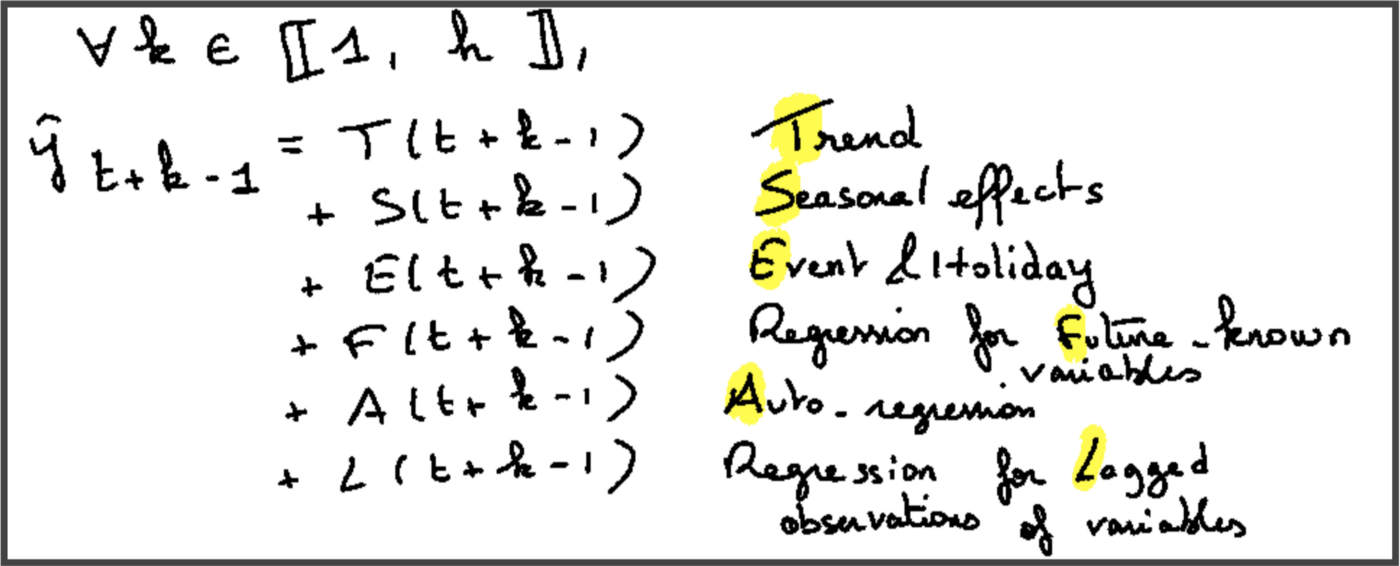

In [4]:
from IPython.display import Image
Image(filename='fonctions.png')

In [5]:
#pip install NeuralProphet
#Fore more options
from neuralprophet import NeuralProphet

help(NeuralProphet)

Help on class NeuralProphet in module neuralprophet.forecaster:

class NeuralProphet(builtins.object)
 |  NeuralProphet(growth='linear', changepoints=None, n_changepoints=10, changepoints_range=0.8, trend_reg=0, trend_reg_threshold=False, trend_global_local='global', yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', seasonality_mode='additive', seasonality_reg=0, season_global_local='global', n_forecasts=1, n_lags=0, num_hidden_layers=0, d_hidden=None, ar_reg=None, learning_rate=None, epochs=None, batch_size=None, loss_func='Huber', optimizer='AdamW', newer_samples_weight=2, newer_samples_start=0.0, quantiles=None, impute_missing=True, impute_linear=10, impute_rolling=10, drop_missing=False, collect_metrics=True, normalize='auto', global_normalization=False, global_time_normalization=True, unknown_data_normalization=False)
 |  
 |  NeuralProphet forecaster.
 |  
 |  A simple yet powerful forecaster that models:
 |  Trend, seasonality, events, holidays, aut

C:\Users\sambe\anaconda3\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Data

In [6]:
data5.columns

Index(['Mois', 'Qualité', 'Territoire', 'Production totale',
       'Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale', 'Solde exportateur', 'Echanges export',
       'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique'],
      dtype='object')

## target and time

In [7]:

#Selecting the important columns the date and the value

data6=pd.DataFrame()


data6["Consommation"]=data5["Consommation totale"]
data6["Date"]=data5.Mois

data6=data6.reset_index(drop=True)

data6.head()

,Consommation,Date
0,51086,2012-01
1,54476,2012-02
2,43156,2012-03
3,40176,2012-04
4,35257,2012-05


## Pensez à renommer !!!!

In [8]:
data6 = data6.rename(columns = {"Date":"ds","Consommation":"y"}) #format à respecter
data6.head()

,y,ds
0,51086,2012-01
1,54476,2012-02
2,43156,2012-03
3,40176,2012-04
4,35257,2012-05


## Lag regressor

In [9]:
data5.head(1)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0


In [10]:
data6["lagReg1"]=data5["Production totale"].values   #on avait vu que cette variable etait interessante (test de Granger)
data6["lagReg2"]=data5["Production thermique charbon"].values   #pareille

data6.head(5)

,y,ds,lagReg1,lagReg2
0,51086,2012-01,57177,741.0
1,54476,2012-02,54419,2511.0
2,43156,2012-03,48583,1435.0
3,40176,2012-04,44192,1655.0
4,35257,2012-05,40433,854.0


In [11]:
data6.tail()

,y,ds,lagReg1,lagReg2
114,32959,2021-07,40555,54.0
115,31184,2021-08,39162,70.0
116,32350,2021-09,38505,498.0
117,36762,2021-10,41695,600.0
118,44458,2021-11,44284,566.0


## Events

In [12]:
eventA_history = pd.DataFrame({
        'event': 'eventA',
        'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                              '2010-01-24', '2010-02-07', '2011-01-08',
                              '2013-01-12', '2014-01-12', '2014-01-19',
                              '2014-02-02', '2017-01-11', '2020-01-17']),
    })

eventB_history = pd.DataFrame({
    'event': 'eventB',
    'ds': pd.to_datetime(['2010-02-07', '2014-02-02']),
    })
history_events_df = pd.concat((eventA_history, eventB_history))
history_events_df

,event,ds
0,eventA,2008-01-13
1,eventA,2009-01-03
2,eventA,2010-01-16
3,eventA,2010-01-24
4,eventA,2010-02-07
5,eventA,2011-01-08
6,eventA,2013-01-12
7,eventA,2014-01-12
8,eventA,2014-01-19
9,eventA,2014-02-02


In [13]:
eventA_future = pd.DataFrame({
    'event': 'eventA',
    'ds': pd.to_datetime(['2021-01-21', '2021-02-07'])
})

eventB_future = pd.DataFrame({
    'event': 'eventB',
    'ds': pd.to_datetime(['2021-01-23', '2021-02-07'])
})

future_events_df = pd.concat((eventA_future, eventB_future))
future_events_df

,event,ds
0,eventA,2021-01-21
1,eventA,2021-02-07
0,eventB,2021-01-23
1,eventB,2021-02-07


## futur regressor

In [14]:
data6['futreg1'] = data5['Production nucléaire'].values
data6['futreg2'] = data5['Production thermique totale'].values

data6.head()

,y,ds,lagReg1,lagReg2,futreg1,futreg2
0,51086,2012-01,57177,741.0,42811.0,5399
1,54476,2012-02,54419,2511.0,38661.0,8721
2,43156,2012-03,48583,1435.0,37549.0,5276
3,40176,2012-04,44192,1655.0,33100.0,3484
4,35257,2012-05,40433,854.0,29058.0,1772


## Holidays

In [15]:
#model.add_country_holidays("FR")

## Model

In [16]:
data6.head(2)

,y,ds,lagReg1,lagReg2,futreg1,futreg2
0,51086,2012-01,57177,741.0,42811.0,5399
1,54476,2012-02,54419,2511.0,38661.0,8721


In [17]:
#pip install holidays==0.14.2

In [18]:
from neuralprophet import NeuralProphet

# Initialisation du modèle NeuralProphet
m = NeuralProphet(
    n_lags=12,                # Prise en compte des 12 derniers mois (données retardées)
    #growth='linear',          # Croissance linéaire pour la tendance
    num_hidden_layers=3,      # Utilisation de 3 couches de neurones
    d_hidden=5,               # Chaque couche comporte 5 neurones
    yearly_seasonality=True,  # Saisonnalité annuelle activée
    weekly_seasonality=False, # Pas de saisonnalité hebdomadaire
    daily_seasonality=False,  # Pas de saisonnalité quotidienne
    epochs=100                # Nombre d'itérations d'entraînement pour actualiser les parametres
)

#pour ceux et celles qui ont la derniere version de neuralprophet, remplacer num_hidden_layers et d_hidden par:
#future_regressors_model='neural_nets',  # Activer les réseaux neuronaux pour les régressions futures
#future_regressors_num_hidden_layers=2,  # Nombre de couches cachées
#future_regressors_d_hidden=64  # Nombre de neurones par couche cachée



m = m.add_lagged_regressor(names='lagReg1') #X1 cause Y et ne data drif pas
m = m.add_lagged_regressor(names='lagReg2') #X2 cause Y et ne data drif pas

m = m.add_future_regressor(name='futreg1')  #X4 est une variable dont on "connait son futur" 
m = m.add_future_regressor(name='futreg2')  #X4 est une variable dont on "connait son futur"

m = m.add_country_holidays("FR", mode="additive") #On prends en compte les vacances en France
m = m.add_events(["eventA", "eventB"])            #On prend en compte les evenements A et B

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (12)
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', number of lags for regressor is set to Autoregression number of lags (12)


In [19]:
history_df = m.create_df_with_events(data6, history_events_df)
history_df

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,y,ds,lagReg1,lagReg2,futreg1,futreg2,eventA,eventB
0,51086,2012-01-01,57177,741.0,42811.0,5399,0.0,0.0
1,54476,2012-02-01,54419,2511.0,38661.0,8721,0.0,0.0
2,43156,2012-03-01,48583,1435.0,37549.0,5276,0.0,0.0
3,40176,2012-04-01,44192,1655.0,33100.0,3484,0.0,0.0
4,35257,2012-05-01,40433,854.0,29058.0,1772,0.0,0.0
...,...,...,...,...,...,...,...,...
114,32959,2021-07-01,40555,54.0,28449.0,1605,0.0,0.0
115,31184,2021-08-01,39162,70.0,29010.0,957,0.0,0.0
116,32350,2021-09-01,38505,498.0,29001.0,2197,0.0,0.0
117,36762,2021-10-01,41695,600.0,30658.0,3621,0.0,0.0


## Train test fit

In [20]:
train_size = int(len(history_df) * 0.8)   #80% de donnees pour l'entrainement
test_size = len(history_df) - train_size  #LE RESTE pour le test (100%-80%)

df_train= history_df.iloc[0:train_size]
df_test = history_df.iloc[train_size:len(history_df)]


print(len(df_train), len(df_test))

metrics = m.fit(df_train, validation_df=df_test, progress="plot")

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.526% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


95 24


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.51E-02, min: 1.00E-01


  0%|          | 0/106 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.31E-03, min: 2.68E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.51E-02
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "C:\Users\sambe\anaconda3\lib\site-packages\neuralprophet\forecaster.py", line 2546, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
  0%|                                                                                          | 0/100 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - C:\Users\sambe\anaconda3\lib\site-packages\torch\nn\modules\loss.py:1040: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results

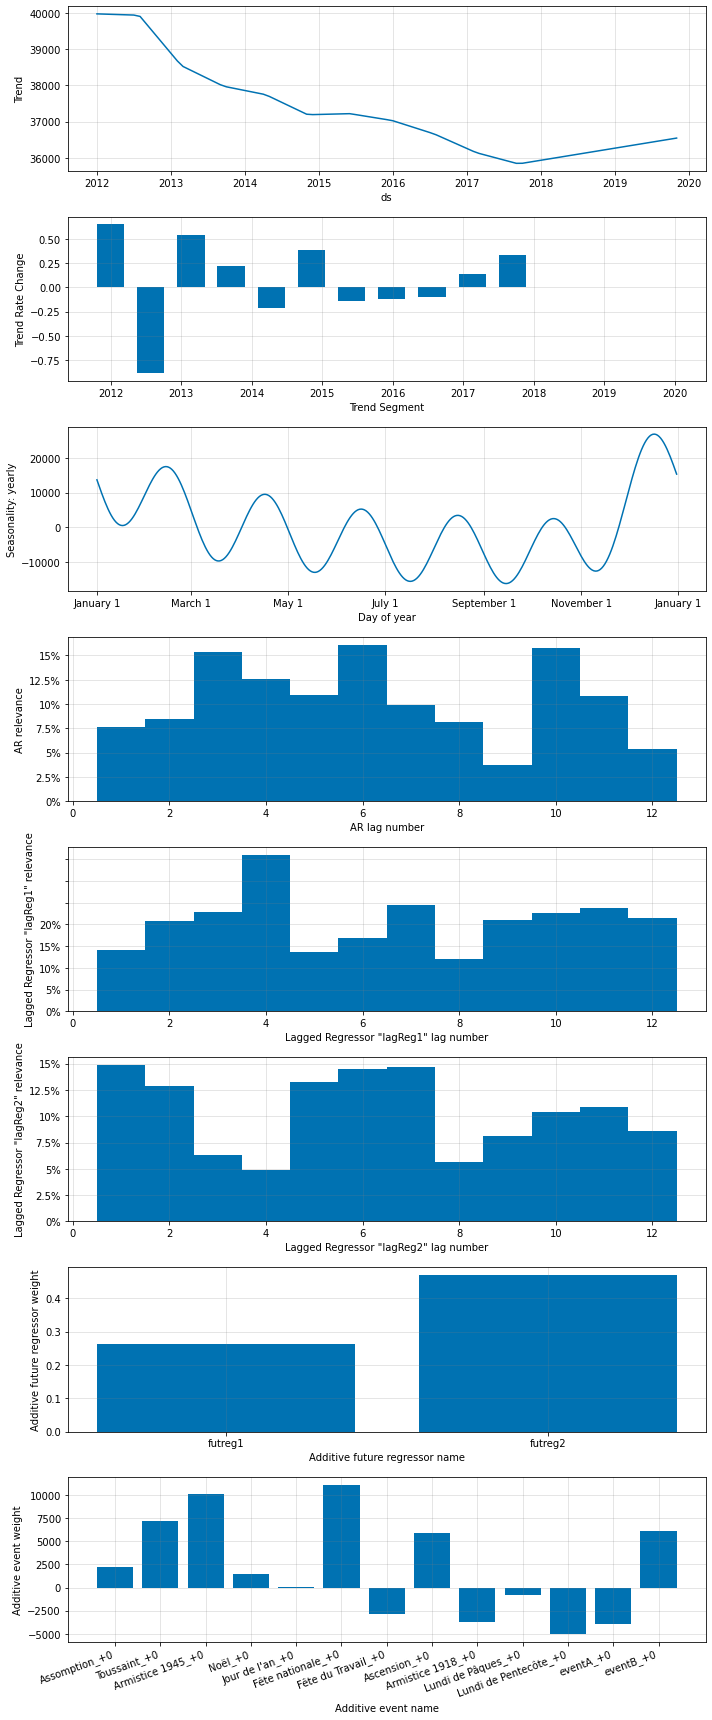

In [21]:
fig_model = m.plot_parameters()

In [22]:
metrics.tail(5)

,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
95,0.001013,712.200372,896.069333,0.000824,0.0,0.093690,7239.942871,9083.978516
96,0.001012,711.860127,933.354439,0.000824,0.0,0.093696,7240.159180,9084.252930
97,0.001012,711.484939,921.152929,0.000823,0.0,0.093699,7240.285645,9084.420898
98,0.001011,711.422227,933.657649,0.000823,0.0,0.093701,7240.362305,9084.525391
99,0.001011,711.397708,941.257192,0.000823,0.0,0.093701,7240.366211,9084.531250


## Loss function

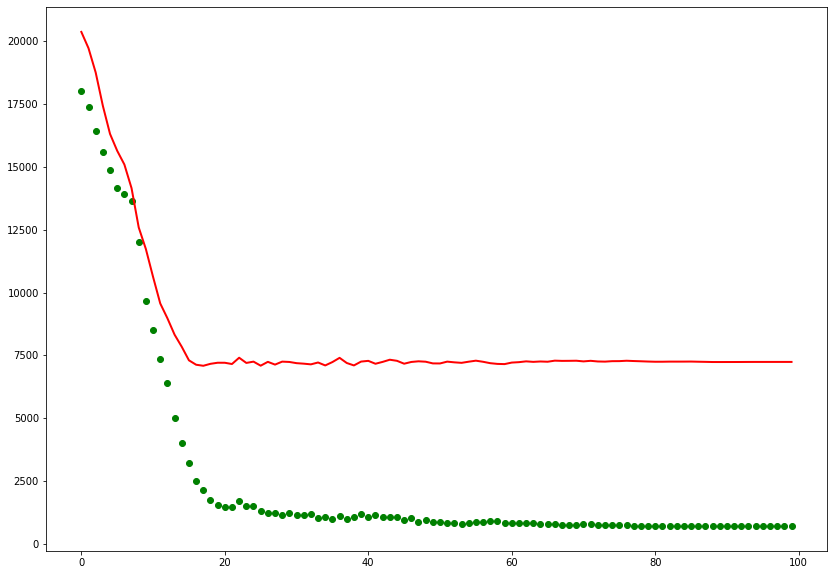

In [23]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss", c="green")  
ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss", c='red')

 ## Predictions

In [24]:

future = history_df
prediction = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.756% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.756% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


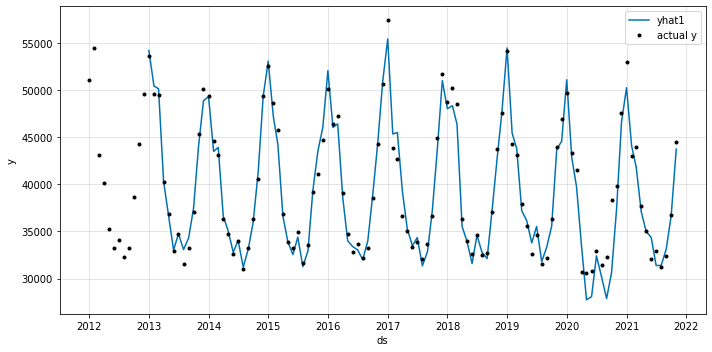

In [25]:

fig_forecast = m.plot(prediction, figsize=(10,5))

## Error analysis

In [26]:
prediction.tail()

,ds,y,residual1,yhat1,ar1,lagged_regressor_lagReg11,lagged_regressor_lagReg21,trend,season_yearly,events_additive,...,event_Jour de l'an,event_Lundi de Pentecôte,event_Lundi de Pâques,event_Noël,event_Toussaint,event_eventA,event_eventB,future_regressors_additive,future_regressor_futreg1,future_regressor_futreg2
114,2021-07-01,32959,-1576.5625,31382.4375,-1484.73291,452.671692,-2004.199341,37100.777344,-4873.213867,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2191.132812,720.641357,1470.491577
115,2021-08-01,31184,207.878906,31391.878906,-1526.125,537.668945,-266.582947,37129.132812,-5767.881836,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285.666016,925.755432,359.910492
116,2021-09-01,32350,806.371094,33156.371094,-2423.331299,2646.300781,112.968613,37157.488281,-7744.615723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3407.561523,922.464783,2485.096436
117,2021-10-01,36762,-91.980469,36670.019531,-2937.98999,2440.510742,-759.248474,37184.929688,-5712.114746,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6453.933105,1528.301025,4925.632324
118,2021-11-01,44458,-718.179688,43739.820312,-5636.998535,3913.639893,-582.123596,37213.285156,-8341.672852,7217.380371,...,0.0,0.0,0.0,0.0,7217.380371,0.0,0.0,9956.308594,1423.001587,8533.306641


<Axes: ylabel='Density'>

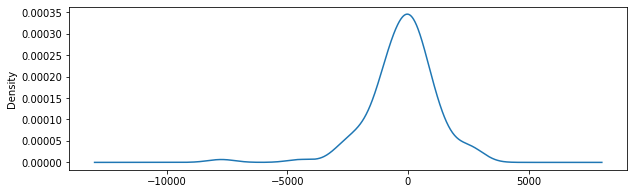

In [27]:
prediction["residual1"].plot(kind="density", figsize=(10,3))

<Axes: >

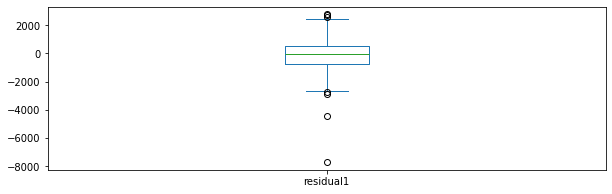

In [28]:
prediction["residual1"].plot(kind="box", figsize=(10,3))

In [29]:
mape=prediction["residual1"].pct_change()
mape.describe()

count    106.000000
mean      -6.415112
std       46.520403
min     -438.453395
25%       -1.646873
50%       -0.677917
75%        0.349724
max       31.215999
Name: residual1, dtype: float64

In [30]:
from scipy.stats import shapiro, jarque_bera
print(shapiro(prediction["residual1"].dropna()))
jarque_bera(prediction["residual1"].dropna())

ShapiroResult(statistic=0.8987889289855957, pvalue=6.076782597119745e-07)


Jarque_beraResult(statistic=237.96404341631182, pvalue=0.0)

In [31]:
#pvalue<5% donc les residus ne sont pâs normale, le modele peut encore etre amelioré

In [32]:
prediction.tail(5)

,ds,y,residual1,yhat1,ar1,lagged_regressor_lagReg11,lagged_regressor_lagReg21,trend,season_yearly,events_additive,...,event_Jour de l'an,event_Lundi de Pentecôte,event_Lundi de Pâques,event_Noël,event_Toussaint,event_eventA,event_eventB,future_regressors_additive,future_regressor_futreg1,future_regressor_futreg2
114,2021-07-01,32959,-1576.5625,31382.4375,-1484.73291,452.671692,-2004.199341,37100.777344,-4873.213867,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2191.132812,720.641357,1470.491577
115,2021-08-01,31184,207.878906,31391.878906,-1526.125,537.668945,-266.582947,37129.132812,-5767.881836,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285.666016,925.755432,359.910492
116,2021-09-01,32350,806.371094,33156.371094,-2423.331299,2646.300781,112.968613,37157.488281,-7744.615723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3407.561523,922.464783,2485.096436
117,2021-10-01,36762,-91.980469,36670.019531,-2937.98999,2440.510742,-759.248474,37184.929688,-5712.114746,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6453.933105,1528.301025,4925.632324
118,2021-11-01,44458,-718.179688,43739.820312,-5636.998535,3913.639893,-582.123596,37213.285156,-8341.672852,7217.380371,...,0.0,0.0,0.0,0.0,7217.380371,0.0,0.0,9956.308594,1423.001587,8533.306641


### prediction

In [36]:
result=pd.DataFrame()
result["reel"]=prediction.y
result["pred"]=prediction.yhat1
result=result.dropna()
result

,reel,pred
12,53619,54202.6875
13,49639,50445.679688
14,49480,50144.988281
15,40292,40308.261719
16,36821,36724.566406
...,...,...
114,32959,31382.4375
115,31184,31391.878906
116,32350,33156.371094
117,36762,36670.019531


<Axes: >

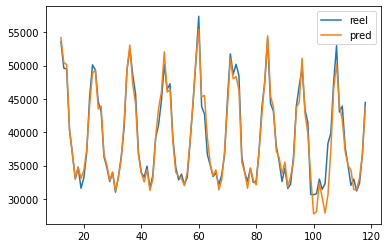

In [37]:
result.plot()

In [39]:
result["erreur"]=(result["pred"]-result["reel"])/result["reel"]*100
result

,reel,pred,erreur
12,53619,54202.6875,1.088583
13,49639,50445.679688,1.625093
14,49480,50144.988281,1.343954
15,40292,40308.261719,0.04036
16,36821,36724.566406,-0.261898
...,...,...,...
114,32959,31382.4375,-4.783405
115,31184,31391.878906,0.66662
116,32350,33156.371094,2.492646
117,36762,36670.019531,-0.250205


<Axes: >

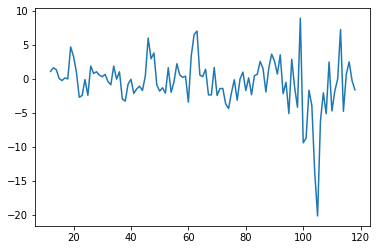

In [40]:
result.erreur.plot()

In [47]:
result.erreur.abs().astype('float').describe()

count    107.000000
mean       2.478977
std        2.872522
min        0.009768
25%        0.686802
50%        1.726965
75%        3.059658
max       20.177021
Name: erreur, dtype: float64

In [ ]:
#le modele a une precision de 97.6% et peut toujours etre amelioré (shapiro test)